In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/winemag-data-130k-v2.csv")
df.shape
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)

In [3]:
df = df.dropna(subset=["country", "province", "variety", "description"])
df.shape

(129907, 14)

In [4]:
df["region"] = df["country"] + "-" + df["province"]
len(df["region"].unique())

425

In [5]:
df["region"].unique()[:10]

array(['Italy-Sicily & Sardinia', 'Portugal-Douro', 'US-Oregon',
       'US-Michigan', 'Spain-Northern Spain', 'France-Alsace',
       'Germany-Rheinhessen', 'US-California', 'Germany-Mosel',
       'Argentina-Other'], dtype=object)

In [6]:
len(df["variety"].unique())

701

In [7]:
df["variety"].unique()[:10]

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese'], dtype=object)

In [8]:
df["region_variety"] = df["region"] + "-" + df["variety"]

In [9]:
region_len = len(df["region"].unique())
variety_len = len(df["variety"].unique())
region_variety_len = len(df["region_variety"].unique())

In [10]:
print(region_len * variety_len, region_variety_len)

297925 4119


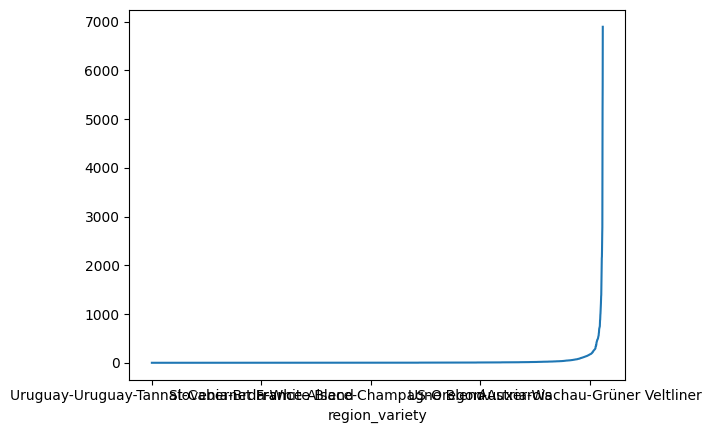

In [11]:
count = df.groupby("region_variety")["id"].count().sort_values()
import matplotlib.pyplot as plt

count.plot()
plt.show()

In [12]:
count

region_variety
Uruguay-Uruguay-Tannat-Cabernet Franc          1
Italy-Northeastern Italy-Petit Manseng         1
US-Oregon-Melon                                1
Italy-Northeastern Italy-Merlot-Cabernet       1
Italy-Northeastern Italy-Marzemino             1
                                            ... 
US-Oregon-Pinot Noir                        2786
France-Bordeaux-Bordeaux-style Red Blend    4617
US-California-Chardonnay                    5183
US-California-Cabernet Sauvignon            5693
US-California-Pinot Noir                    6896
Name: id, Length: 4119, dtype: int64

In [14]:
count_ls = count.tolist()
import numpy as np

np.quantile(count_ls, np.arange(0, 1, 0.05))

array([ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  2. ,  2. ,  2. ,
        3. ,  4. ,  5. ,  6. ,  8. , 11. , 18. , 32. , 93.1])

In [14]:
for idx, x in enumerate(count):
    if x >= 3:
        print(idx, x)
        break
for idx, x in enumerate(count):
    if x >= 10:
        print(idx, x)
        break

2085 3
3192 10


In [15]:
df = df.groupby("region_variety").filter(lambda x: len(x) >= 20)
df.shape

(117283, 16)

In [16]:
len(df["region_variety"].unique())

584

In [17]:
df = df[["description", "region_variety"]]
df.to_csv("../data/wine_cleaned.csv", index=False)